In [ ]:
import tensorflow as tf 
from  tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

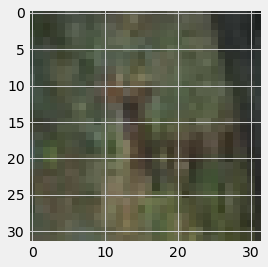

In [ ]:
#SHOW AS PICTURE
img=plt.imshow(x_train[index])

In [ ]:
print("the image label is ",y_train[index])

the image label is  [4]


In [ ]:
#classsification
classsification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#img classsification
print('the image clas',classsification[y_train[index][0]])

the image clas deer


In [ ]:
#create neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print ("the one_hot_label",y_train_one_hot[index])

the one_hot_label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#LET'S NORMALISE VALUE
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#MODULE ARCHITECTURE
model=Sequential()
model.add(Conv2D(32,(5,5,),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#ADD CONNOTHER LAYER
model.add(Conv2D(32,(5,5,),activation='relu'))
#ADD ANOTHER POOING LAYER 
model.add(MaxPooling2D(pool_size=(2,2)))
#FLATT LAYER 
model.add(Flatten())
#add nuron layer
model.add(Dense(1000,activation='relu'))
#droplayer 
model.add(Dropout(0.5))
#add nuron layer
model.add(Dense(500,activation='relu'))
#droplayer 
model.add(Dropout(0.5))
#add nuron layer
model.add(Dense(250,activation='relu'))
#droplayer 

model.add(Dense(10,activation='softmax'))
#droplayer 


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#train model
hist=model.fit(x_train,y_train_one_hot,
              batch_size=256,
              epochs=10,
              validation_split= 0.2)

Epoch 1/10
157/157 [==============================] - 57s 364ms/step - loss: 0.7369 - accuracy: 0.7374 - val_loss: 0.9189 - val_accuracy: 0.6830
Epoch 2/10
157/157 [==============================] - 55s 351ms/step - loss: 0.7013 - accuracy: 0.7509 - val_loss: 0.9034 - val_accuracy: 0.6926
Epoch 3/10
157/157 [==============================] - 55s 350ms/step - loss: 0.6535 - accuracy: 0.7685 - val_loss: 0.9152 - val_accuracy: 0.6886
Epoch 4/10
157/157 [==============================] - 55s 351ms/step - loss: 0.6059 - accuracy: 0.7840 - val_loss: 1.0076 - val_accuracy: 0.6679
Epoch 5/10
157/157 [==============================] - 55s 350ms/step - loss: 0.5848 - accuracy: 0.7907 - val_loss: 0.9314 - val_accuracy: 0.6881
Epoch 6/10
157/157 [==============================] - 56s 354ms/step - loss: 0.5410 - accuracy: 0.8075 - val_loss: 0.9644 - val_accuracy: 0.6835
Epoch 7/10
157/157 [==============================] - 55s 350ms/step - loss: 0.5102 - accuracy: 0.8190 - val_loss: 0.9448 - val_ac

In [ ]:
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9822 - accuracy: 0.6930


0.6930000185966492

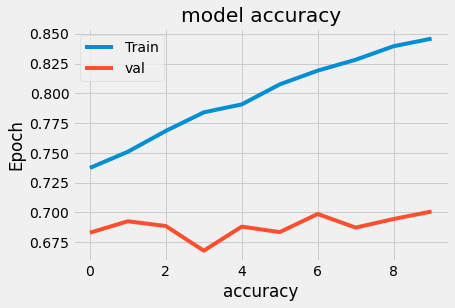

In [ ]:
#VISUALISE THE MODEL
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('Epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()

In [ ]:
#VIAULISE MODEL LOSS


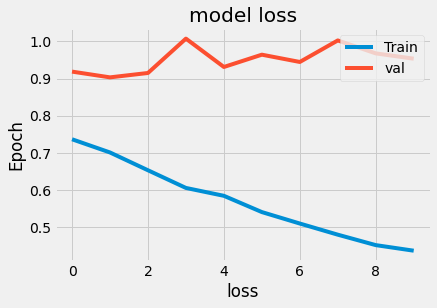

In [ ]:
#VISUALISE THE MODEL
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('Epoch')
plt.legend(['Train','val'],loc='upper right')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored